In [81]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [82]:
# -----------------------------
# 1) 데이터 준비
# -----------------------------
df = pd.read_csv("/content/drive/MyDrive/기계학습프로그래밍/실습 파일/diabetes.csv")
X = df.drop(columns=["BMI"])
y = df["BMI"]

In [83]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,0.627,50,1
1,1,85,66,29,0,0.351,31,0
2,8,183,64,0,0,0.672,32,1
3,1,89,66,23,94,0.167,21,0
4,0,137,40,35,168,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63,0
764,2,122,70,27,0,0.340,27,0
765,5,121,72,23,112,0.245,30,0
766,1,126,60,0,0,0.349,47,1


In [84]:
y

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
...,...
763,32.9
764,36.8
765,26.2
766,30.1


In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [86]:
# 2. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [87]:
# 3. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.3, random_state=42
)

In [88]:
# 4. DL 모델 정의 (MLP)
model = Sequential()
model.add(Dense(128, input_shape=(8,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # 회귀니까 출력 뉴런은 1개

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
# 5. 모델 컴파일
model.compile(
    optimizer='adam',
    loss='mse',     # 평균제곱오차
    metrics=['mae'] # 평균절대오차
)

In [78]:
# 6. 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0390 - mae: 0.1274 - val_loss: 0.0183 - val_mae: 0.0614
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mae: 0.0568 - val_loss: 0.0174 - val_mae: 0.0497
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0161 - mae: 0.0432 - val_loss: 0.0159 - val_mae: 0.0426
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0151 - mae: 0.0338 - val_loss: 0.0155 - val_mae: 0.0435
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mae: 0.0351 - val_loss: 0.0153 - val_mae: 0.0416
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mae: 0.0347 - val_loss: 0.0153 - val_mae: 0.0380
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mae: 0.0328 - val_loss: 0.0152 - val_mae: 0.0378
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mae: 0.0306 - val_loss: 0.0152 - val_mae: 0.0374
Epoch 9/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mae:

In [79]:
# 7. 평가
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"DL 모델 테스트 MAE: {mae:.4f}")  # 정확도 대신 MAE 확인

DL 모델 테스트 MAE: 0.0364


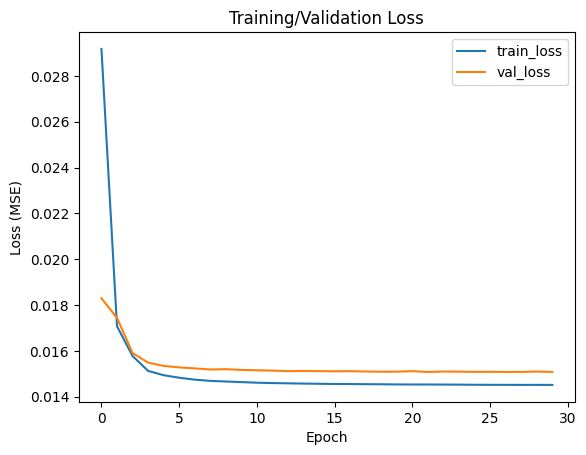

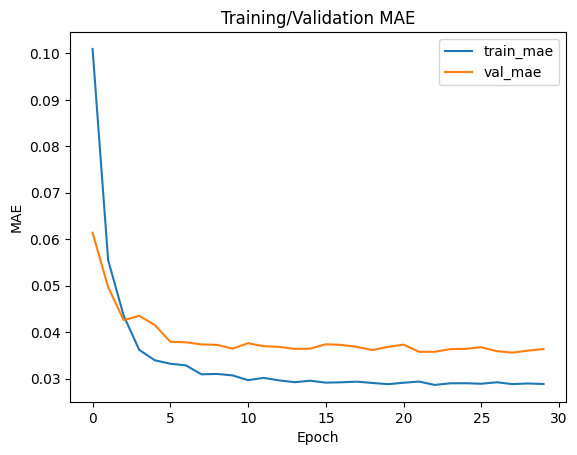

In [80]:
# 8 손실(loss) 시각화
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.title("Training/Validation Loss")
plt.show()

# MAE 시각화
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.title("Training/Validation MAE")
plt.show()